**Insurance Claims Fraud Detection Project**

**Problem Statement:**

**Business case:**

**Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.**

**In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.**

**In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.**

In [52]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


**Checking unique Values**

In [54]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

**Policy number and incident_location is having 1000 unique values it will not be helpful in any predictions**

**We are going to drop these columns**

In [55]:
df.drop(["policy_number", "incident_location"],inplace=True,axis=1)

**Checking count of Null values in Dataset**

In [56]:
df.isna().sum()


months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                   

**_c39 is having 1000 null values logically filling these values does not make any sense**

**we are dropping this column**

In [57]:
df.drop(columns=['_c39'],inplace=True)

**Checking count of Duplicate values**

In [58]:
df.duplicated().sum()

0

**No Duplicate values are present in Dataset**

In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

**Checking Overall health of Data**

In [60]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,NaN,NaN,NaN,203.954,115.113174,0.0,115.75,199.5,276.25,479.0
age,1000.0,NaN,NaN,NaN,38.948,9.140287,19.0,32.0,38.0,44.0,64.0
policy_bind_date,1000,951,01-01-2006,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_state,1000,3,OH,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_csl,1000,3,250/500,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,1000.0,NaN,NaN,NaN,1136.0,611.864673,500.0,500.0,1000.0,2000.0,2000.0
policy_annual_premium,1000.0,NaN,NaN,NaN,1256.40615,244.167395,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,NaN,NaN,NaN,1101000.0,2297406.598118,-1000000.0,0.0,0.0,0.0,10000000.0
insured_zip,1000.0,NaN,NaN,NaN,501214.488,71701.610941,430104.0,448404.5,466445.5,603251.0,620962.0
insured_sex,1000,2,FEMALE,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Seprating Object and Integer Data type columns**

In [61]:
# getting list of all object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n ",object_datatype)

# getting the list of all numeric data type column names
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n ",number_datatype)

Object Data Type Columns are:
  ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

Number Data Type Columns are:
  ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


**Checking count of Object_datatype values in columns**

In [62]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cl

In [63]:
# replacing the "?" filled rows with a meaningful name of "Others"
df['collision_type'] = df['collision_type'].replace('?', 'Others')
df['property_damage'] = df['property_damage'].replace('?', 'Others')
df['police_report_available'] = df['police_report_available'].replace('?', 'Others')

In [64]:
# separating the Date column into seperate day - month -  year columns using pandas Datetime method
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Day'] = df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_Month'] = df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_Year'] = df['policy_bind_date'].apply(lambda x:x.year)

# separating the Date column into seperate day - month -  year columns using pandas Datetime method
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Day'] = df['incident_date'].apply(lambda x:x.day)
df['incident_Month'] = df['incident_date'].apply(lambda x:x.month)
df['incident_Year'] = df['incident_date'].apply(lambda x:x.year)

In [65]:
# dropping the original Date columns after separating the desired outputs
df.drop(columns = ['policy_bind_date','incident_date'], axis=1, inplace=True)

In [66]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_zip                    995
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
total_claim_amount             763
injury_claim        

**Incident year is having one Unique value,we are going to drop this column**

In [67]:
df.drop(columns=['incident_Year'],inplace=True)

# Visualization

Double digit category column name: umbrella_limit


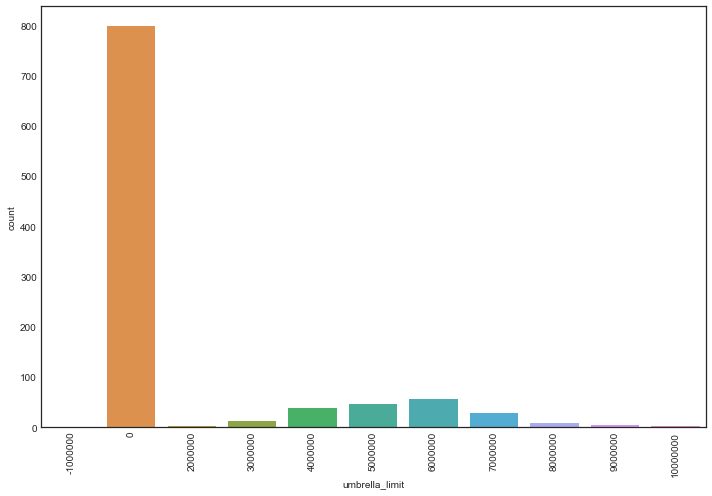

Double digit category column name: insured_occupation


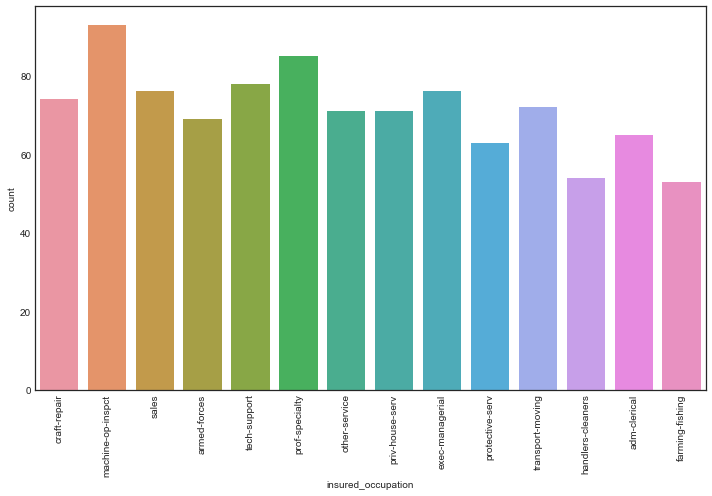

Double digit category column name: auto_make


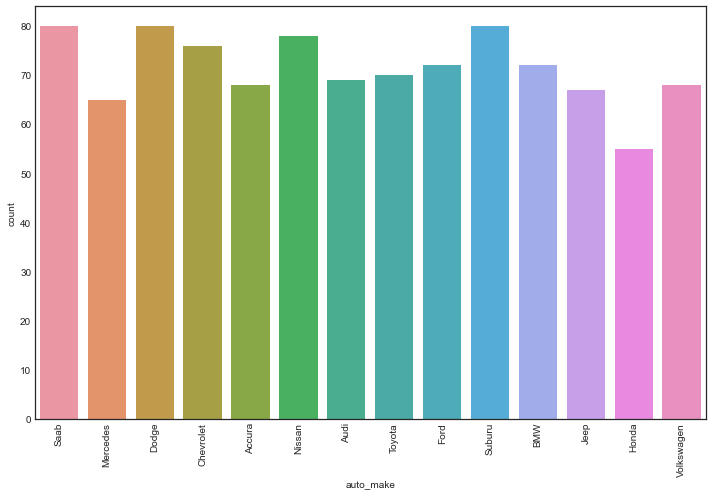

Double digit category column name: insured_hobbies


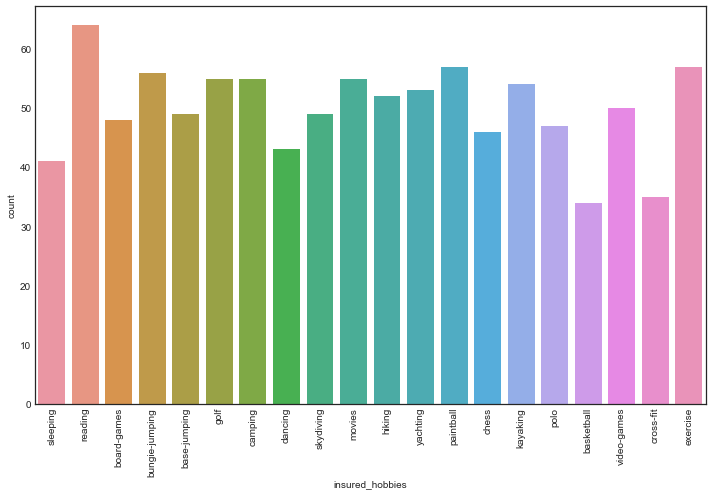

Double digit category column name: auto_model


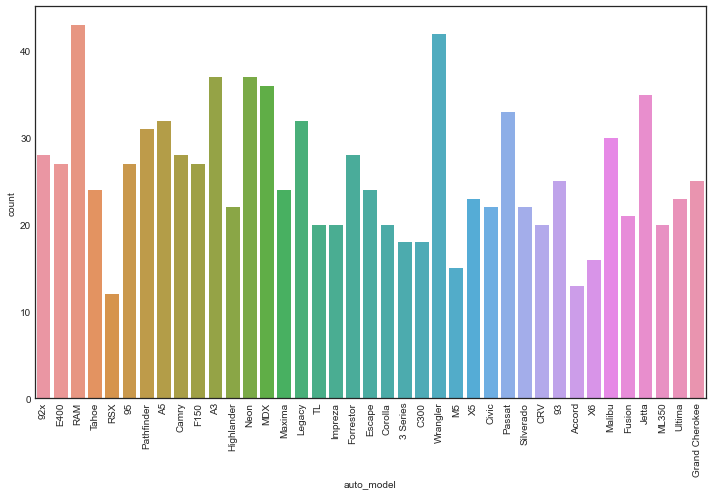

In [68]:
def generate_countplot(x):
    plt.figure(figsize=(10,7))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

col2 = ['umbrella_limit', 'insured_occupation', 'auto_make', 'insured_hobbies', 'auto_model']

for j in df[col2]:
    print(f"Double digit category column name:", j)
    generate_countplot(df[j])

                                        **Observations**
                                        

**In Umbrella limit is the highest for the number 0 as compared with any other value in the column**

**In Occupation of all the insured people we see the highest data coverage by machine operation inspector and professional speciality designations**

**In Vehicle companies we see a higher scale of data for saab, dodge, nissan, suburu and volkswagen**

**In Listeing of hobbies held by insured people has the highest data coverage on reading**

**In vehicle models that were registered for incidents  we can visualize lots of data rows covered by RAM and Wrangler automobile models**                                       

Single digit category column name: fraud_reported


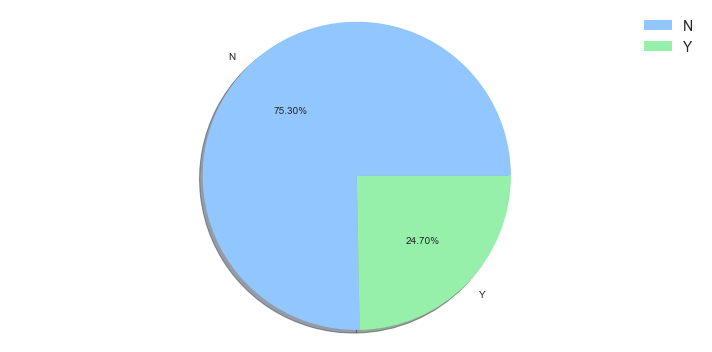

Single digit category column name: insured_sex


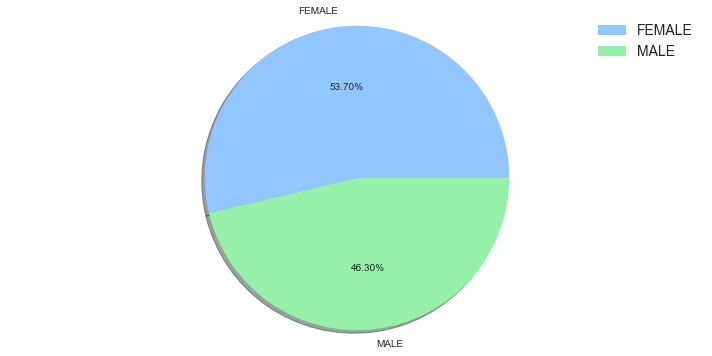

Single digit category column name: policy_state


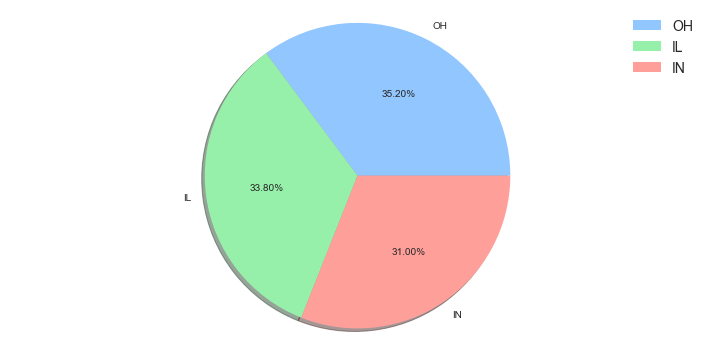

Single digit category column name: policy_csl


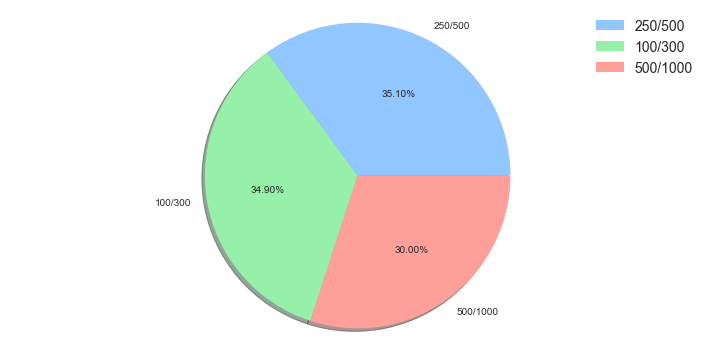

Single digit category column name: policy_deductable


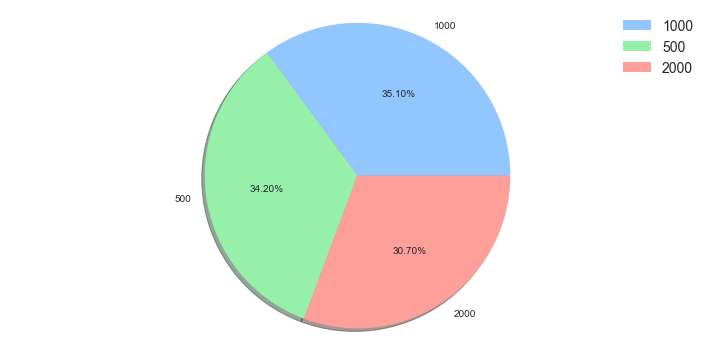

Single digit category column name: bodily_injuries


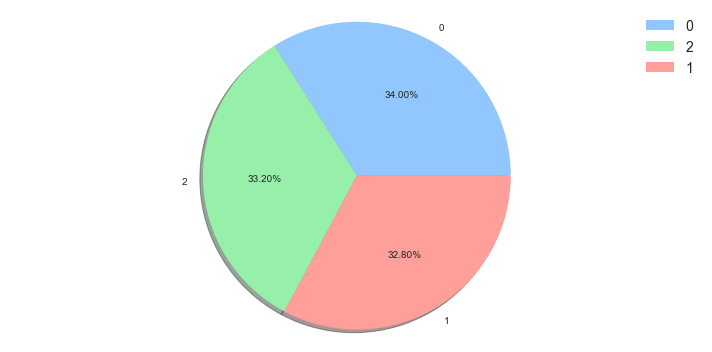

Single digit category column name: police_report_available


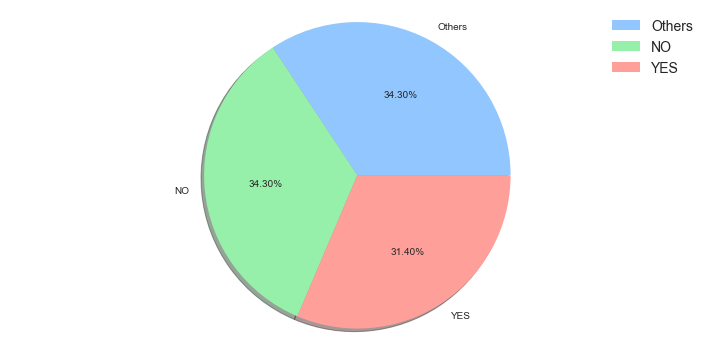

Single digit category column name: property_damage


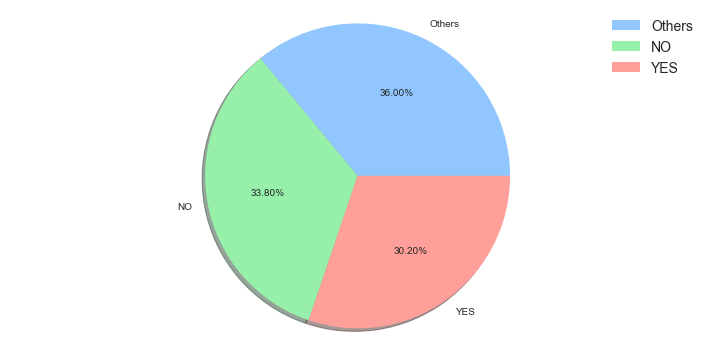

Single digit category column name: incident_type


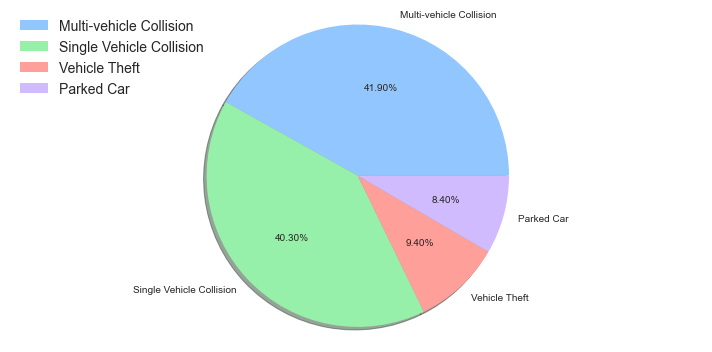

Single digit category column name: collision_type


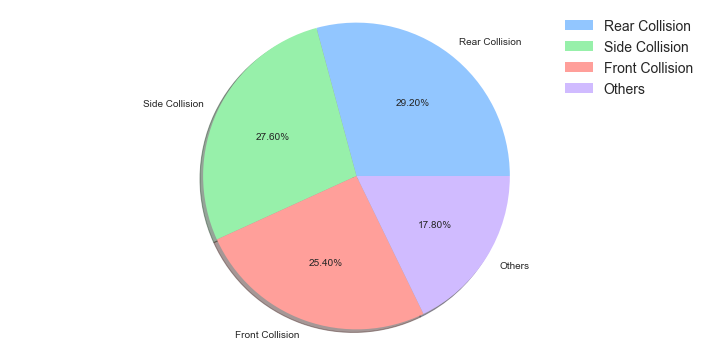

Single digit category column name: incident_severity


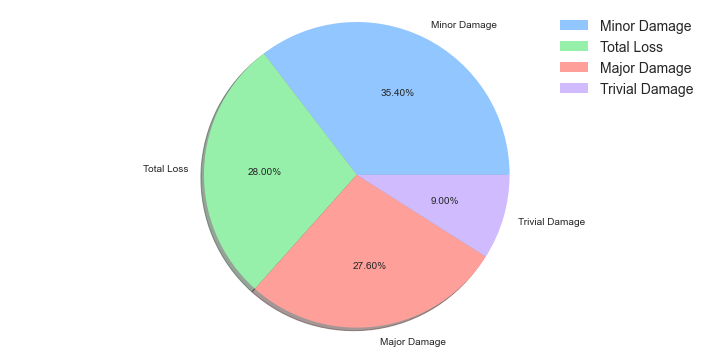

Single digit category column name: number_of_vehicles_involved


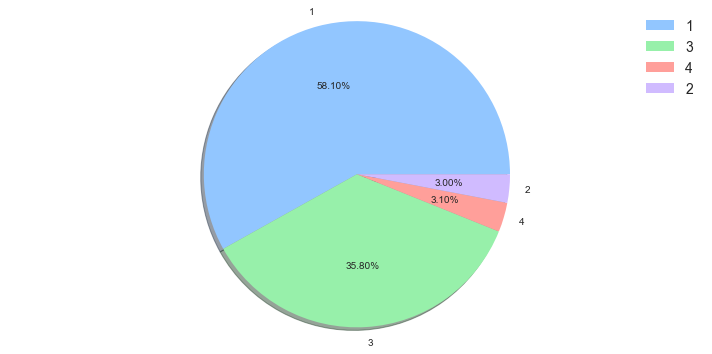

Single digit category column name: witnesses


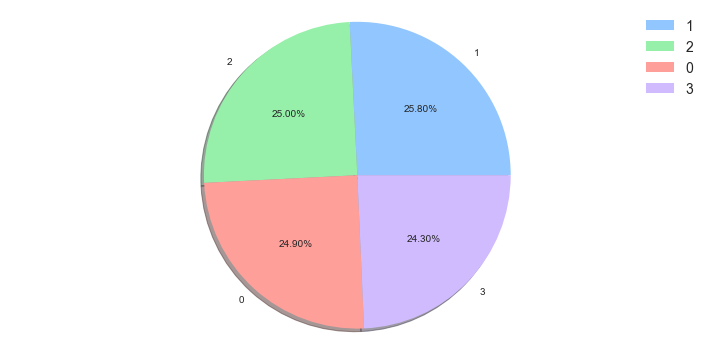

Single digit category column name: authorities_contacted


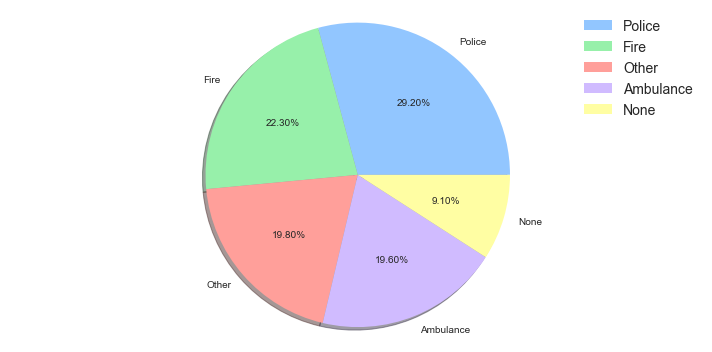

Single digit category column name: insured_relationship


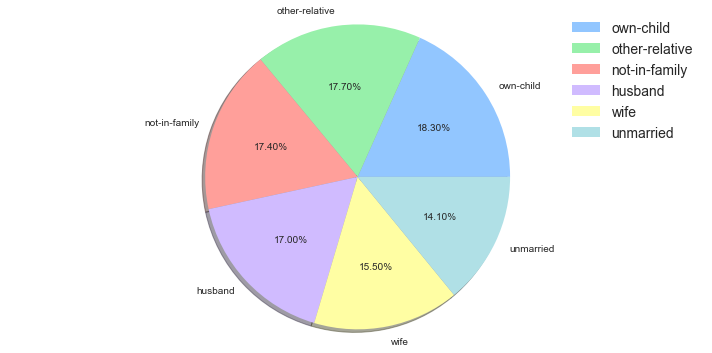

Single digit category column name: insured_education_level


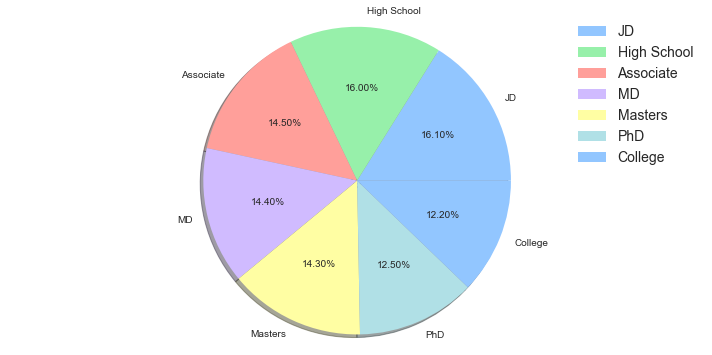

Single digit category column name: incident_state


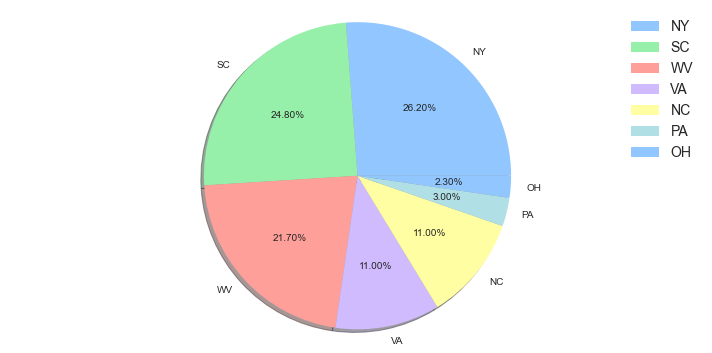

Single digit category column name: incident_city


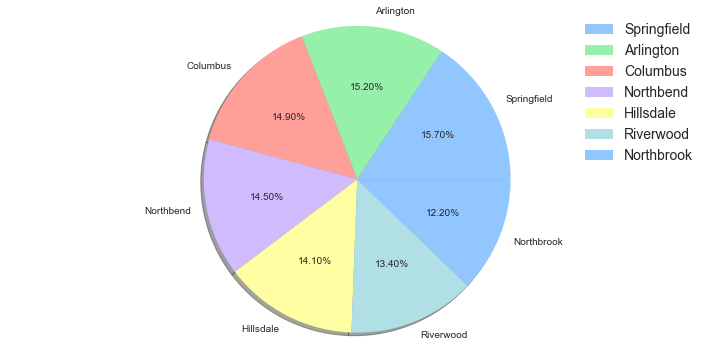

In [69]:
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

col1 = ['fraud_reported', 'insured_sex', 'policy_state', 'policy_csl', 'policy_deductable', 'bodily_injuries',
        'police_report_available', 'property_damage', 'incident_type', 'collision_type', 'incident_severity',
        'number_of_vehicles_involved', 'witnesses', 'authorities_contacted', 'insured_relationship',
        'insured_education_level', 'incident_state', 'incident_city']

for i in df[col1]:
    print(f"Single digit category column name:", i)
    generate_pie(df[i])

                                             **Observations**

**Class Imbalance has been noticed in our Target variable,we will resolve the same using SMOTE**

**Males and Females have taken the Insurance on a good count,but as compared with Males count of Females are higher**

**In policy_state we can clearly visualize OH,IL and IN are almost on same scale where OH is having the maximum percentage and IN is just 4.20% < OH**


**In the policy sections again we see that 250/500 category has a slighty higher data coverage than the 100-300 and 500/1000 categories**


**In policy deductable criteria we can see 1000 to be at a higher rate than it's 500 and 2000 data counterparts
in terms of bodily injueries the severity for level 0 is slightly higher than the level 2 and 1**

**In Police report availability only 31.40 percent people were able to produce genuine reports while the remaining 34.30 percent were either unable to show a report or the authenticity was questionable**

**In Property damage data we see that 36 percent of the information is questionable while 33.80 percent people did not face any property damage so only 30.20 percent people suffered from property damage**

**In Accident type then single vehicle and multi vehicle collisions have covered more than 40 percent data each and then we have 9.40 percent incidents for vehicle theft and 8.40 percent incidents for parked car**

**In Collision type categories we see 29.20 percent incident vehicles with rear collision which is like the highest and 17.80 percent of vehicle incidents are questionable**

**While measuring the incident severity the highest category covers for minor damages with 35.40 percent and lowest number in incident severity is of 9 percent that only has trivial damage data**

**The number of vehicles being involved in an incident majorly lies for 1 and 3**

**In witnesses section then all the categories of witnesses are almost similarly distributed**

**In authority was contacted after an accident covers the police being notified the most then the fire brigade and ambulances but also has data on others being called and none being informed when it came to contacting people**

**In insured relationship column I see almost all the categorical value equally distributed and covering the data rows
similar to insured relationship even insured education level column has it's data rows distributed equally amongst all the categorical values it holds**

**In incident state column I see major portion of data rows are covered by New York, South Carolina and West Virginia states**

**In incident related city all the cities that are listed in the column have an equal share of data coverage**

insured_sex vs fraud_reported column ->


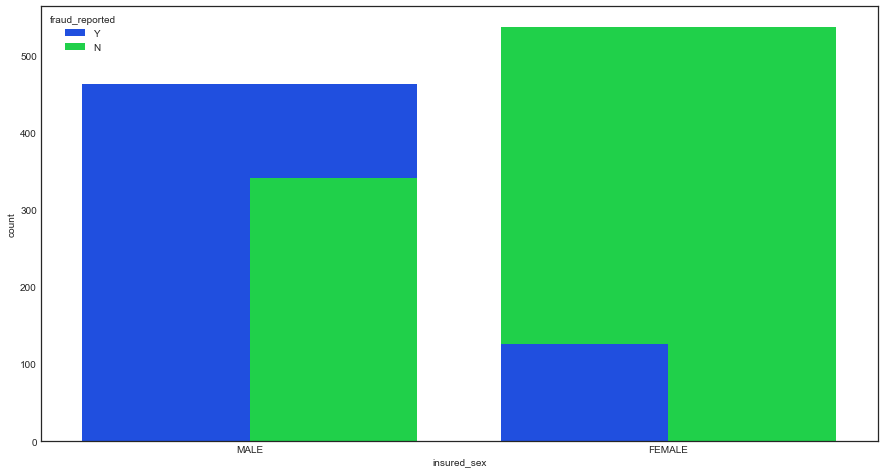

policy_state vs fraud_reported column ->


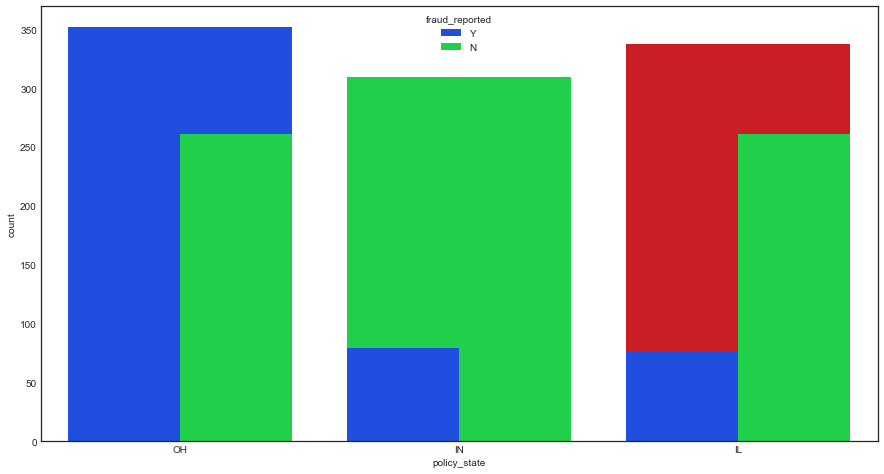

policy_csl vs fraud_reported column ->


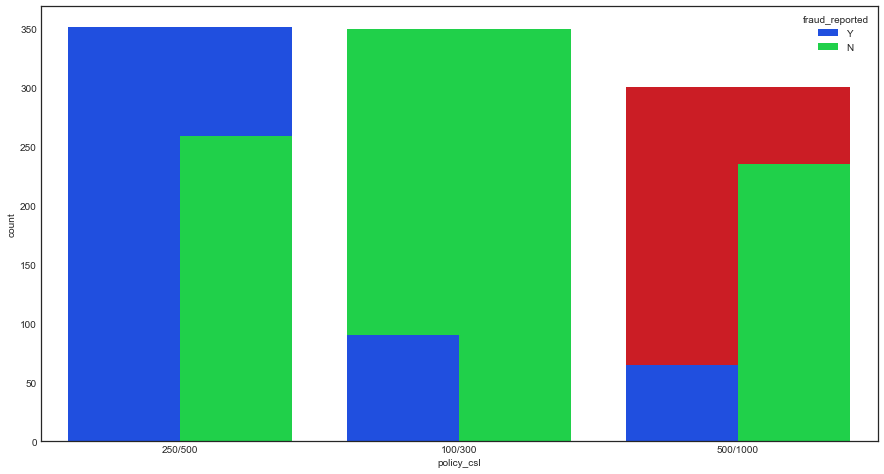

policy_deductable vs fraud_reported column ->


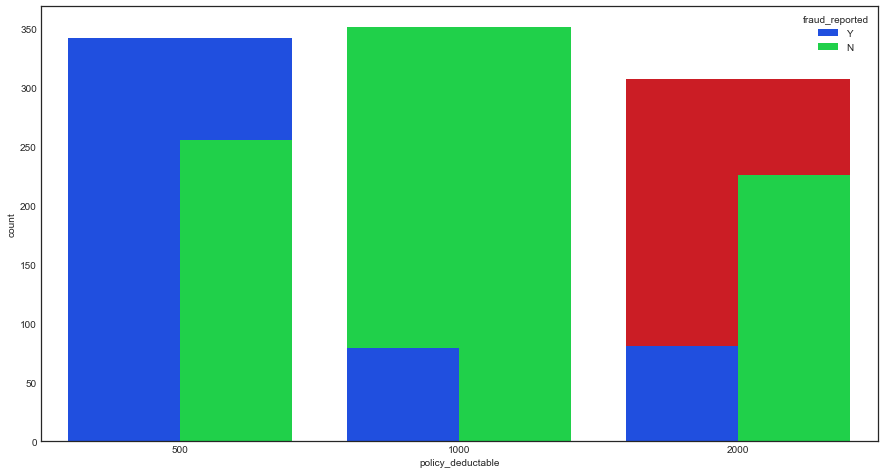

bodily_injuries vs fraud_reported column ->


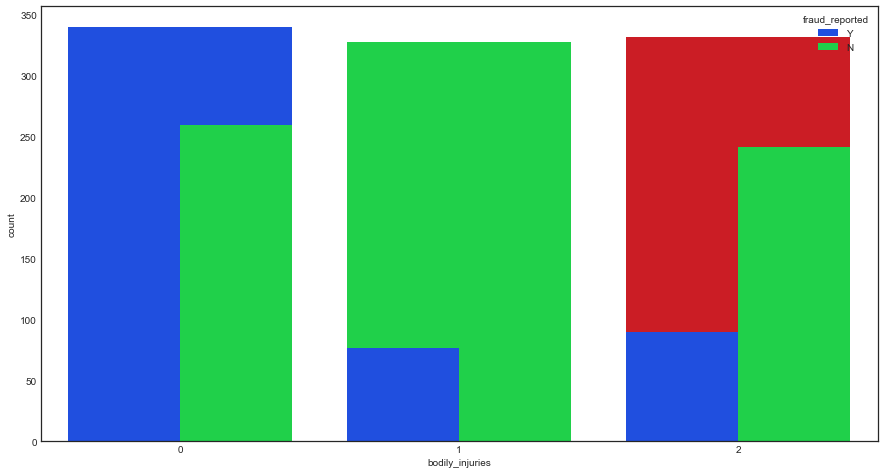

police_report_available vs fraud_reported column ->


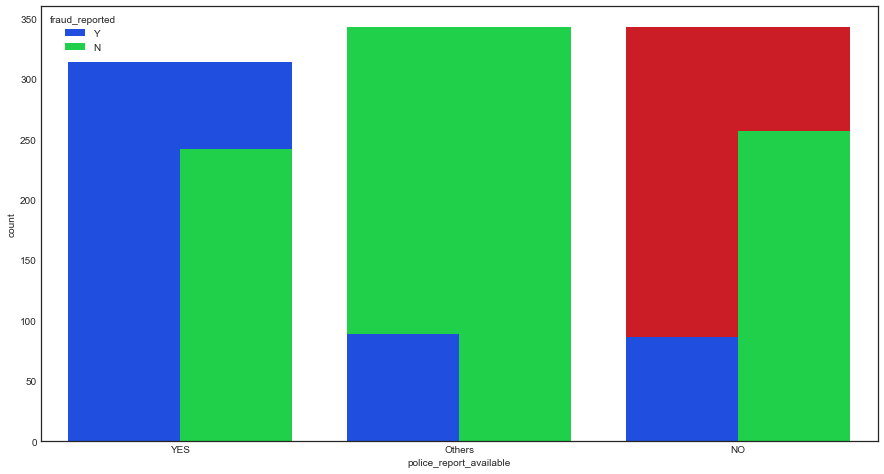

property_damage vs fraud_reported column ->


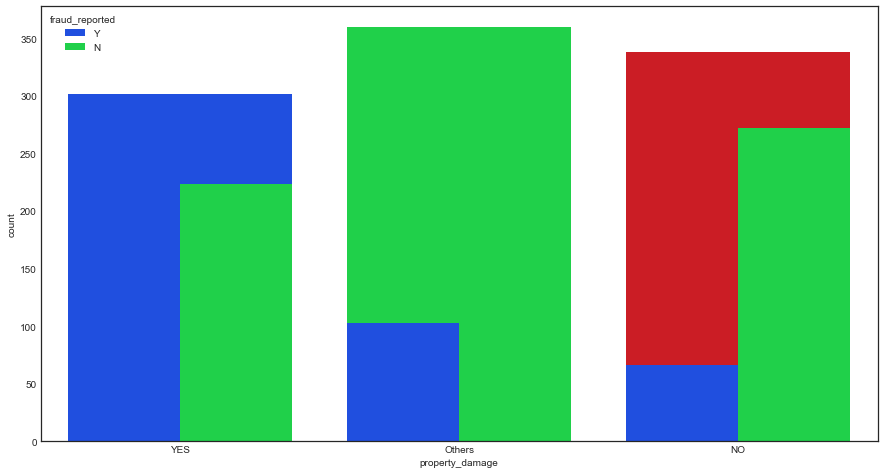

incident_type vs fraud_reported column ->


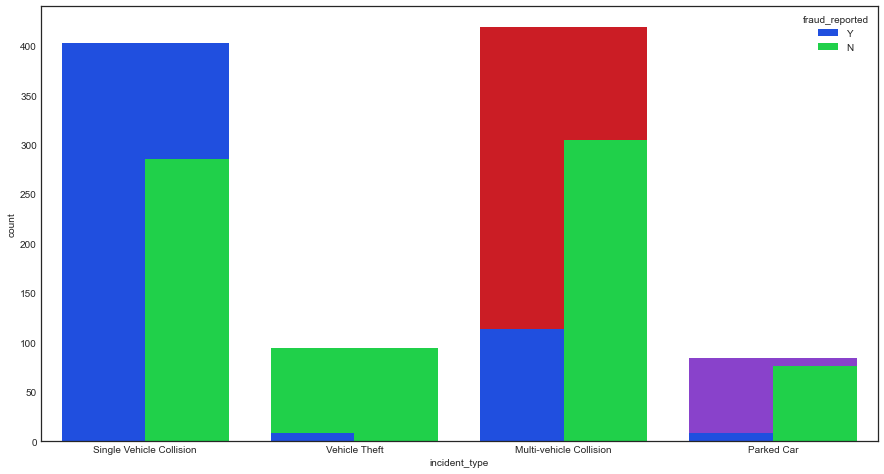

collision_type vs fraud_reported column ->


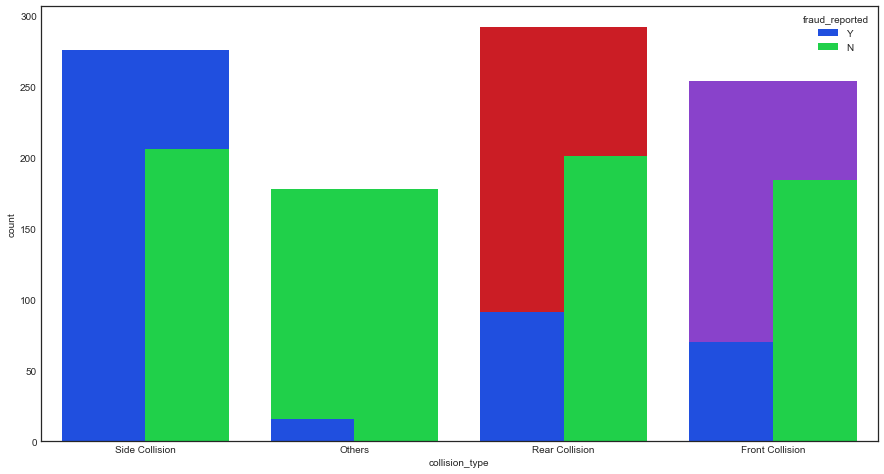

incident_severity vs fraud_reported column ->


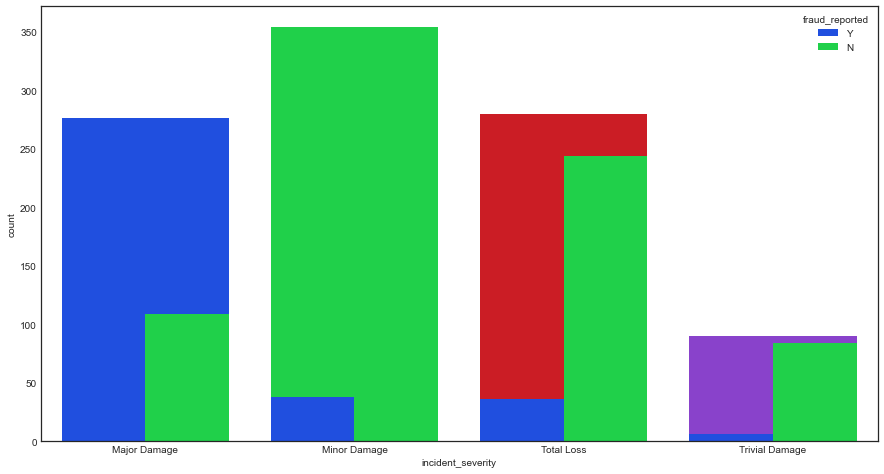

number_of_vehicles_involved vs fraud_reported column ->


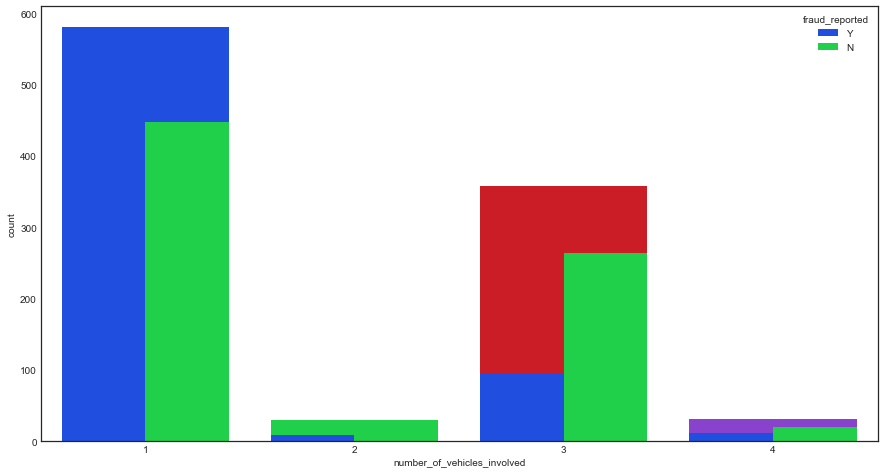

witnesses vs fraud_reported column ->


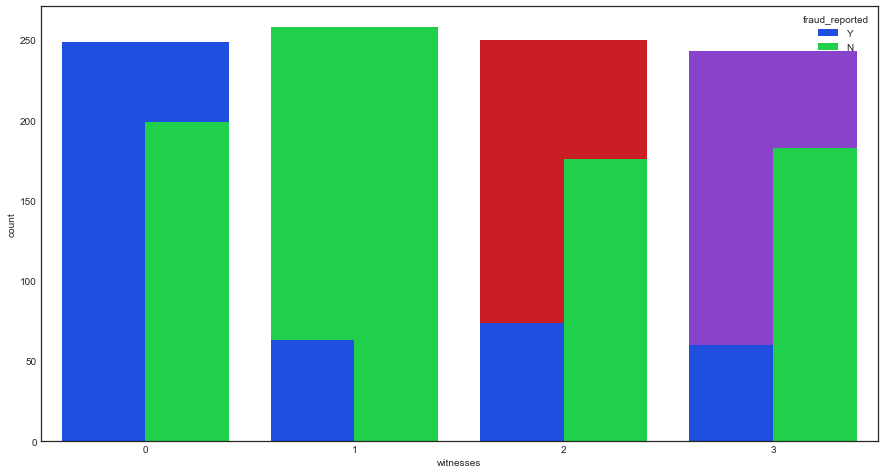

authorities_contacted vs fraud_reported column ->


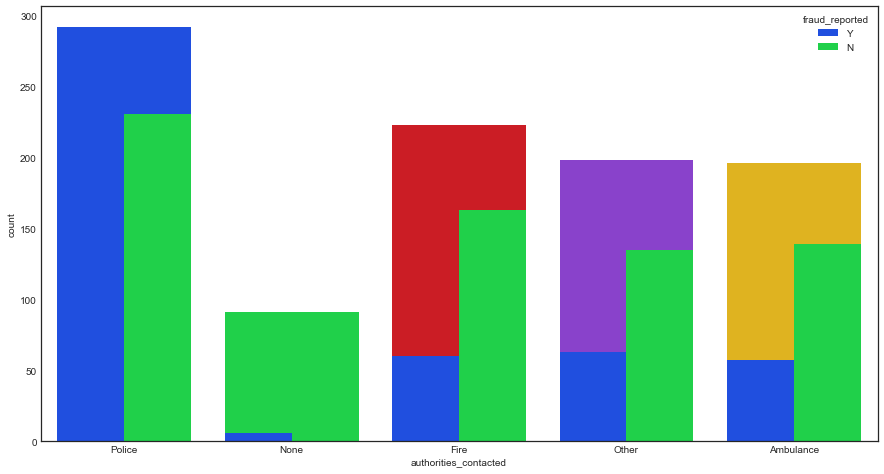

insured_relationship vs fraud_reported column ->


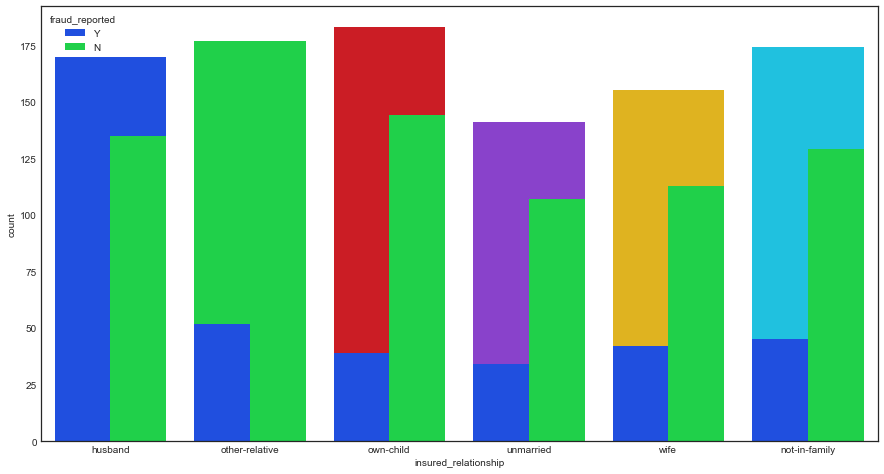

insured_education_level vs fraud_reported column ->


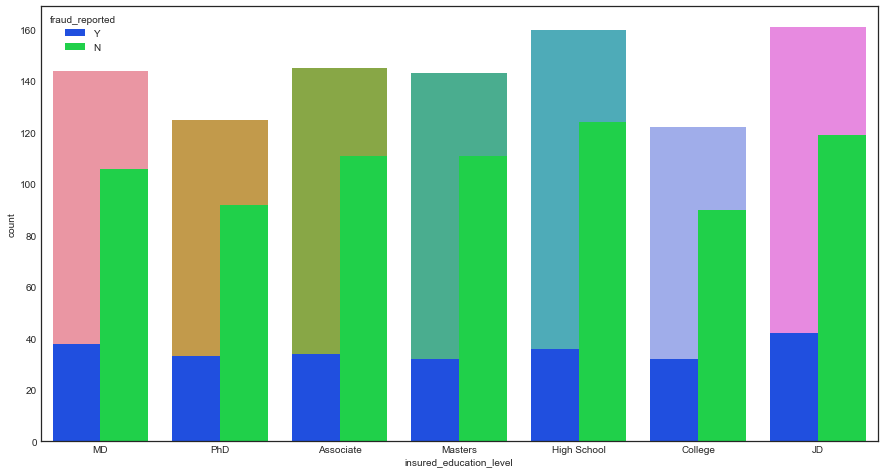

incident_state vs fraud_reported column ->


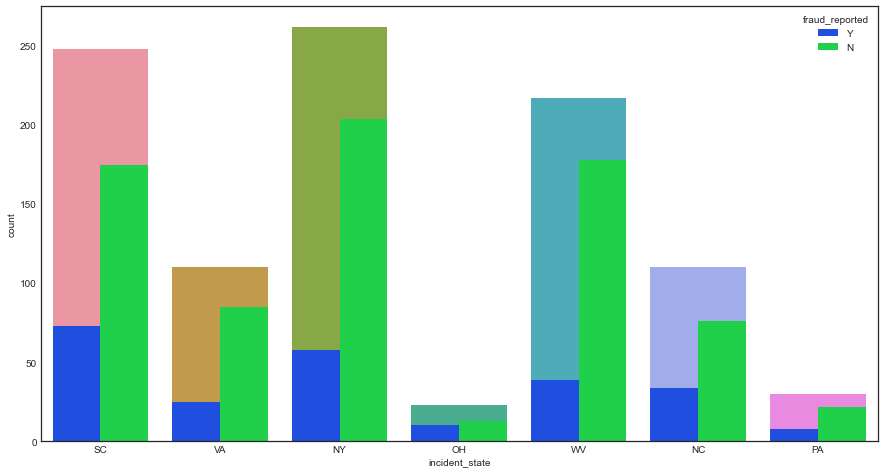

incident_city vs fraud_reported column ->


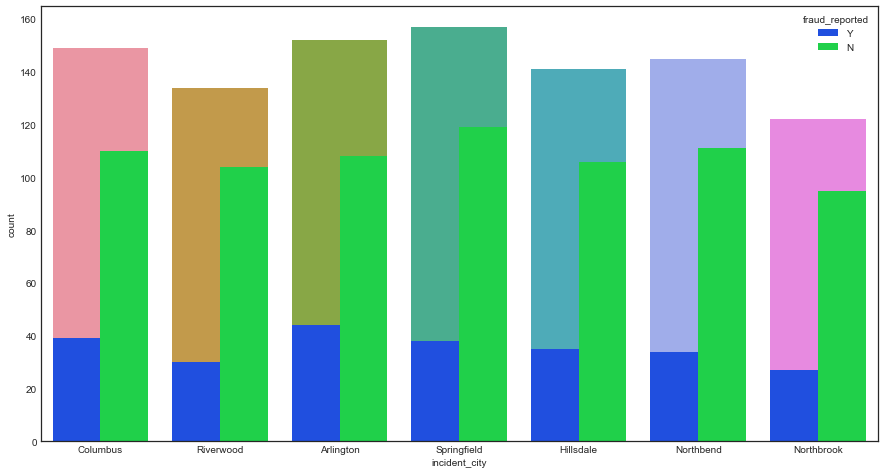

umbrella_limit vs fraud_reported column ->


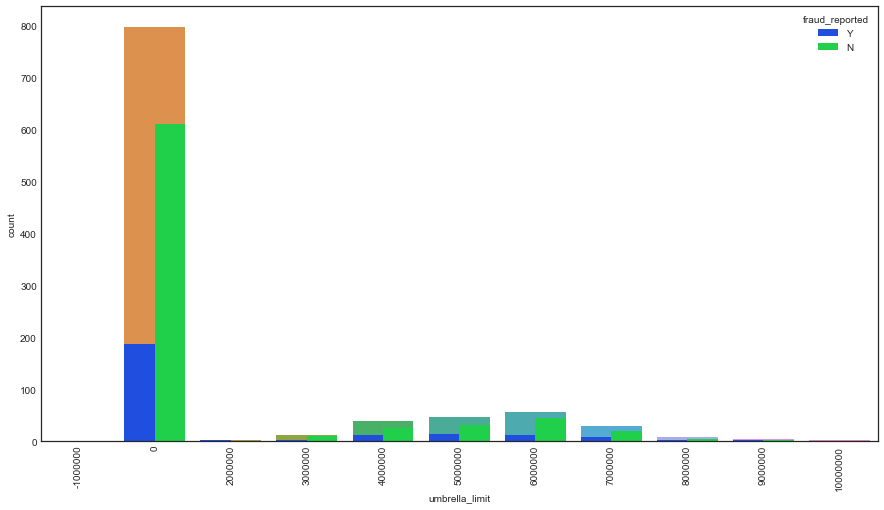

insured_occupation vs fraud_reported column ->


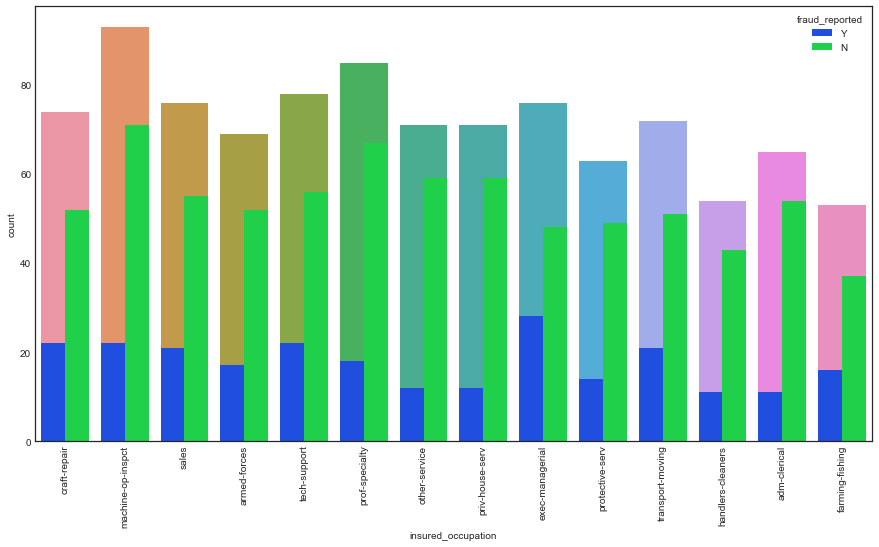

auto_make vs fraud_reported column ->


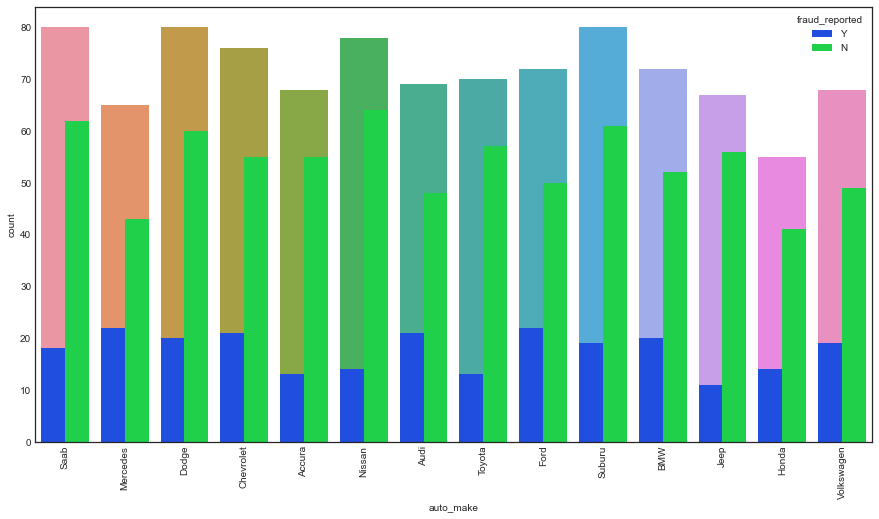

insured_hobbies vs fraud_reported column ->


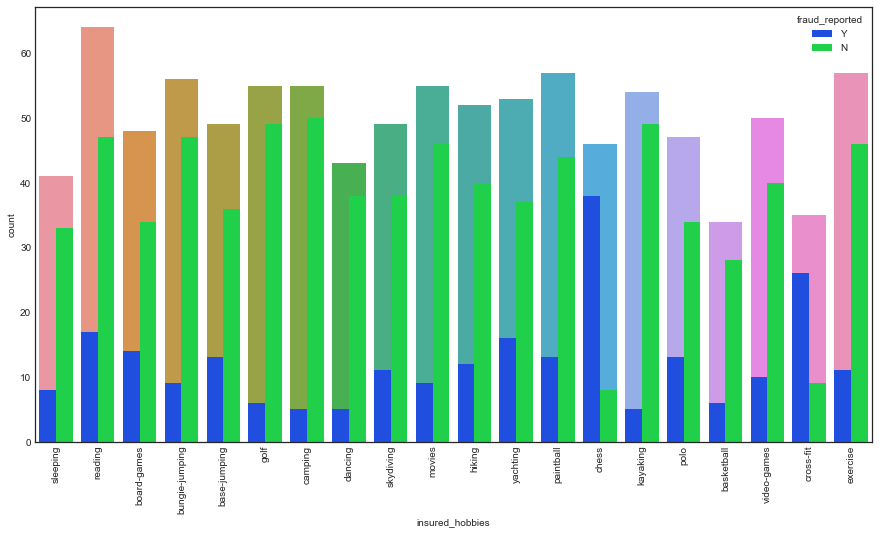

auto_model vs fraud_reported column ->


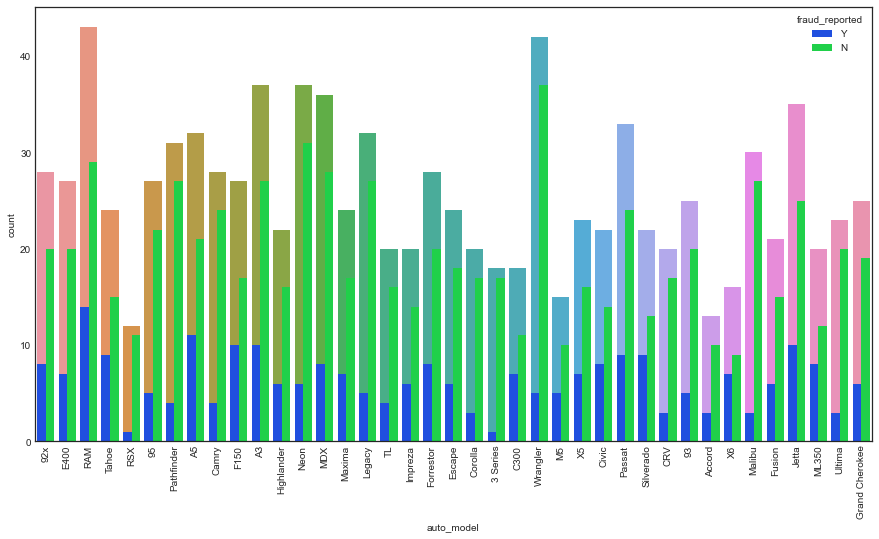

In [70]:
plt.style.use('seaborn-bright')

col1.remove("fraud_reported")

for k in df[col1]:
    plt.figure(figsize=(15,8))
    print(f"{k} vs fraud_reported column ->")
    sns.countplot(df[k])
    sns.countplot(df[k], hue=df['fraud_reported'])
    plt.show()
    
for l in df[col2]:
    plt.figure(figsize=(15,8))
    print(f"{l} vs fraud_reported column ->")
    sns.countplot(df[l])
    sns.countplot(df[l], hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.show()

                                          **Observations**

**Males has been visualized to be reporting more frauds as compared to Females**

**OH has been visaulized with the most frauds reported where 'IN' has been visaulized as lowest**

**In policy_csl 25/500 has been visaulized as the most reported frauds**

**In policy deductable 500 has been inculcate with the maximum fraud counts**

**In the bodily_injuries least count of frauds has been visaulized,in 0 highest has been visualized**

**When their is police_report avalaible we can see the maximum frauds have been reported**

**In property damage very miniscule count of No in others has been visualized and in Yes we can visaulize the maximum frauds reported**

**In single veichle collission we can visaulize the maximum frauds reported**

**Where their is a Major_damage we can visualize the maximum number of frauds**

**When number of veichles involved in 1 we can visualize the most number of frauds reported**

**Police has been contacted the most of times when their is any fraud reported**

**In males husband maximum number of frauds has been reported**

**admn_clerical has been visdualized as the least number of frauds reported section**

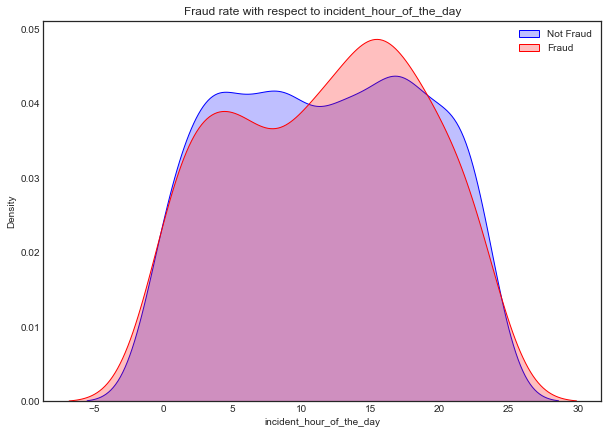

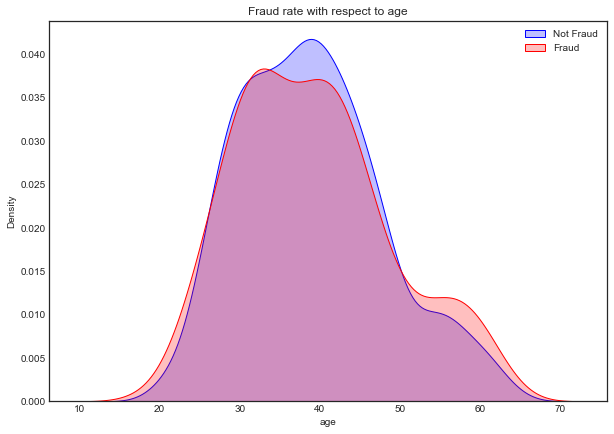

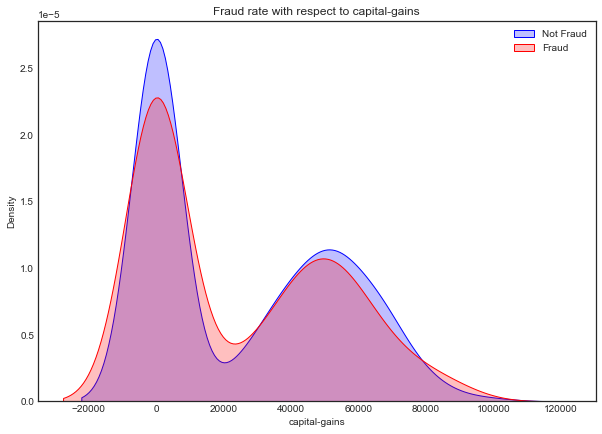

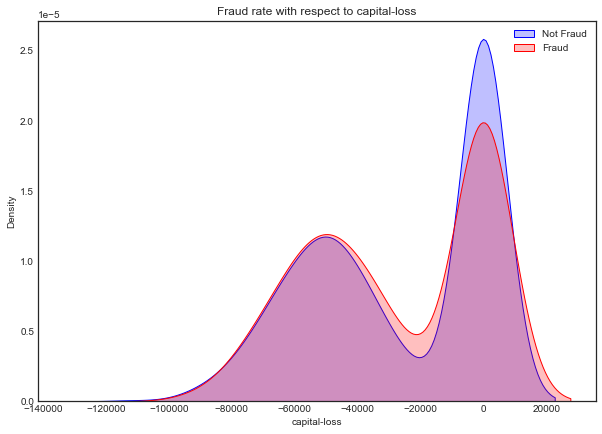

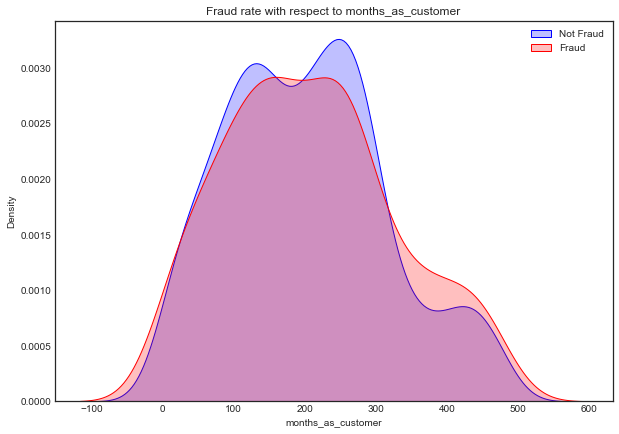

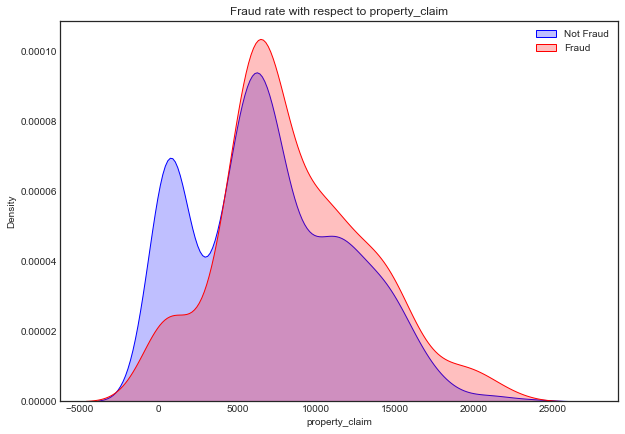

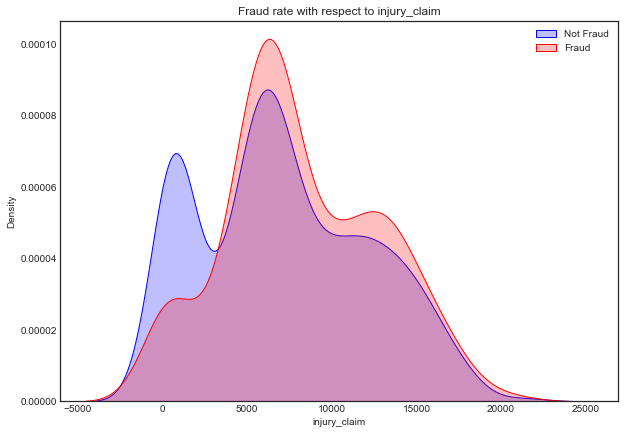

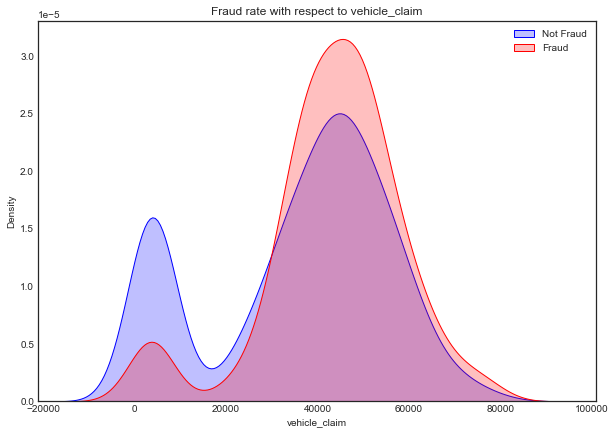

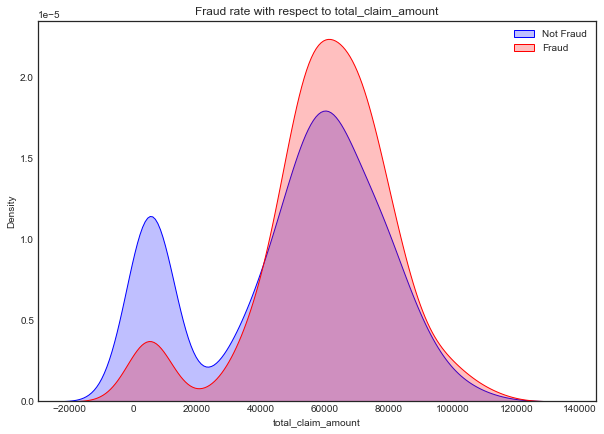

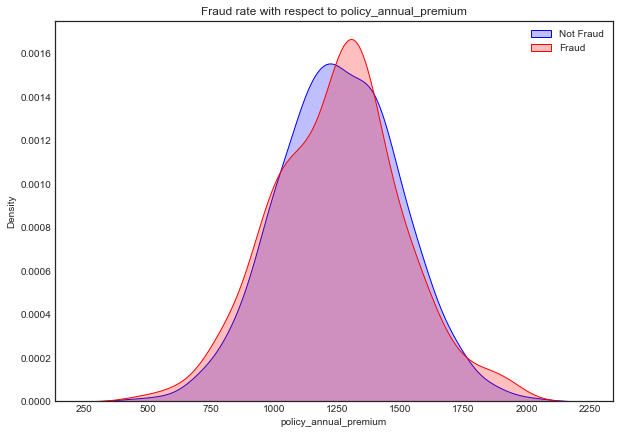

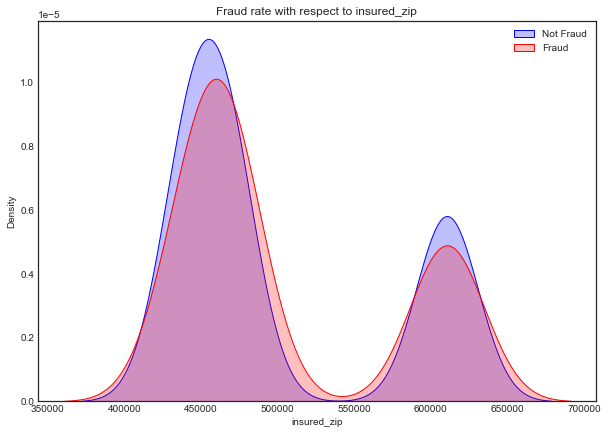

In [71]:
col3 = ['incident_hour_of_the_day', 'age', 'capital-gains', 'capital-loss', 'months_as_customer', 'property_claim',
       'injury_claim', 'vehicle_claim', 'total_claim_amount', 'policy_annual_premium', 'insured_zip']

for z in df[col3]:
    fig = plt.figure(figsize=(10,7))
    ax=sns.kdeplot(df.loc[(df['fraud_reported'] == 'N'),z], color='b', shade=True, label='Not Fraud') 
    ax=sns.kdeplot(df.loc[(df['fraud_reported'] == 'Y'),z], color='r', shade=True, label='Fraud')
    plt.title('Fraud rate with respect to {}'.format(z))
    plt.legend()
    plt.show()


                                            **Observations**

**Label Column: fraud_reported(2)**

**Category columns as col1: insured_sex(2) policy_state(3) policy_csl(3) policy_deductable(3) bodily_injuries(3)** 

**Police_report_available(3) property_damage(3) incident_type(4) collision_type(4) incident_severity(4)** 

**Number_of_vehicles_involved(4) witnesses(4) authorities_contacted(5) insured_relationship(6) insured_education_level(7) incident_state(7) incident_city(7)**

**More category columns as col2: umbrella_limit(11) insured_occupation(14) auto_make(14) insured_hobbies(20) auto_model(39)**

**High unique value numeric columns as col3: incident_hour_of_the_day(24) age(46) capital-gains(338) capital-loss(354) months_as_customer(391) property_claim(626) injury_claim(638) vehicle_claim(726) total_claim_amount(763) policy_annual_premium(991) insured_zip(995)**

In [72]:
# getting list of all object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)


Object Data Type Columns are:
 ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


**Encoding**

In [73]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [74]:
# Label Encoder

le = LabelEncoder()
df["fraud_reported"] = le.fit_transform(df["fraud_reported"])
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,52080,Saab,92x,2004,1,17,10,2014,25,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,3510,Mercedes,E400,2007,1,27,6,2006,21,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,23100,Dodge,RAM,2007,0,9,6,2000,22,2
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,50720,Chevrolet,Tahoe,2014,1,25,5,1990,1,10
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,4550,Accura,RSX,2009,0,6,6,2014,17,2


In [75]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df, object_datatype)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,52080,10.0,1.0,2004,1.0,17,10,2014,25,1
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,3510,8.0,12.0,2007,1.0,27,6,2006,21,1
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,23100,4.0,30.0,2007,0.0,9,6,2000,22,2
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,50720,3.0,34.0,2014,1.0,25,5,1990,1,10
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,...,4550,0.0,31.0,2009,0.0,6,6,2014,17,2


**Outliers**

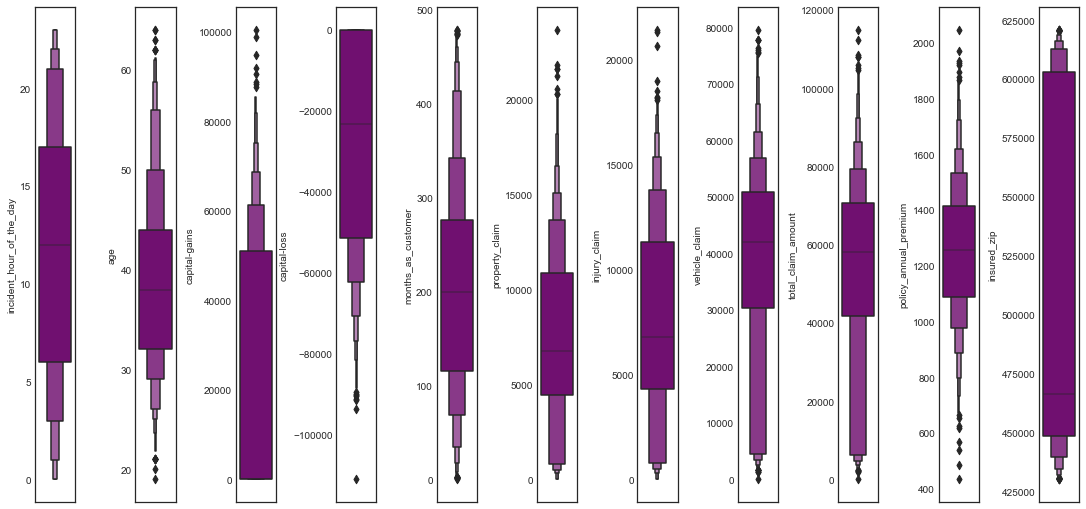

In [76]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=11, nrows=1, figsize=(15,7))
index = 0
ax = ax.flatten()
for col, value in df[col3].items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="purple")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()


**We have visualized 80% of our columns are inculcate with outliers**

**We will use Zscore to resolve the same**

**Skewness**

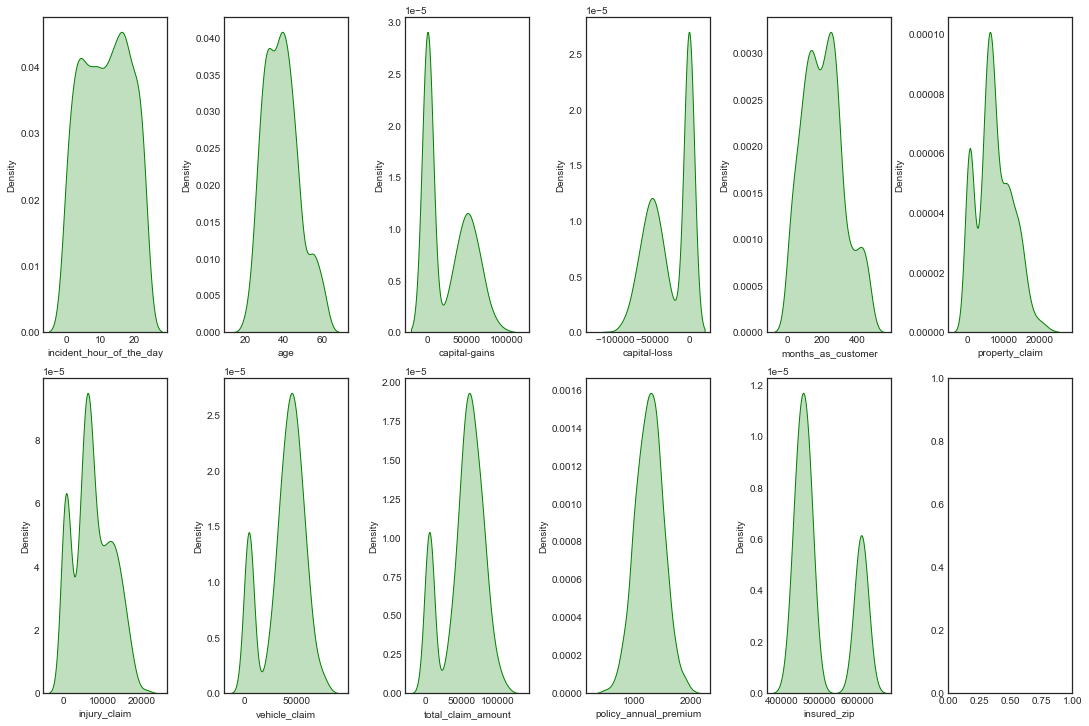

In [77]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df[col3].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()


**We can visualize their is skewness present in our columns**

**we will handle the same using Log method of numpy**

**Using Z Score to remove outliers**

In [78]:
from scipy.stats import zscore

In [79]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1000, 40)
Shape of the dataframe after removing outliers:  (980, 40)
Percentage of data loss post outlier removal:  2.0


**Percentage Loss is acceptable**

**Using Log Transform to fix skewness**

In [80]:
for col in number_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

**Correlation using a Heatmap**

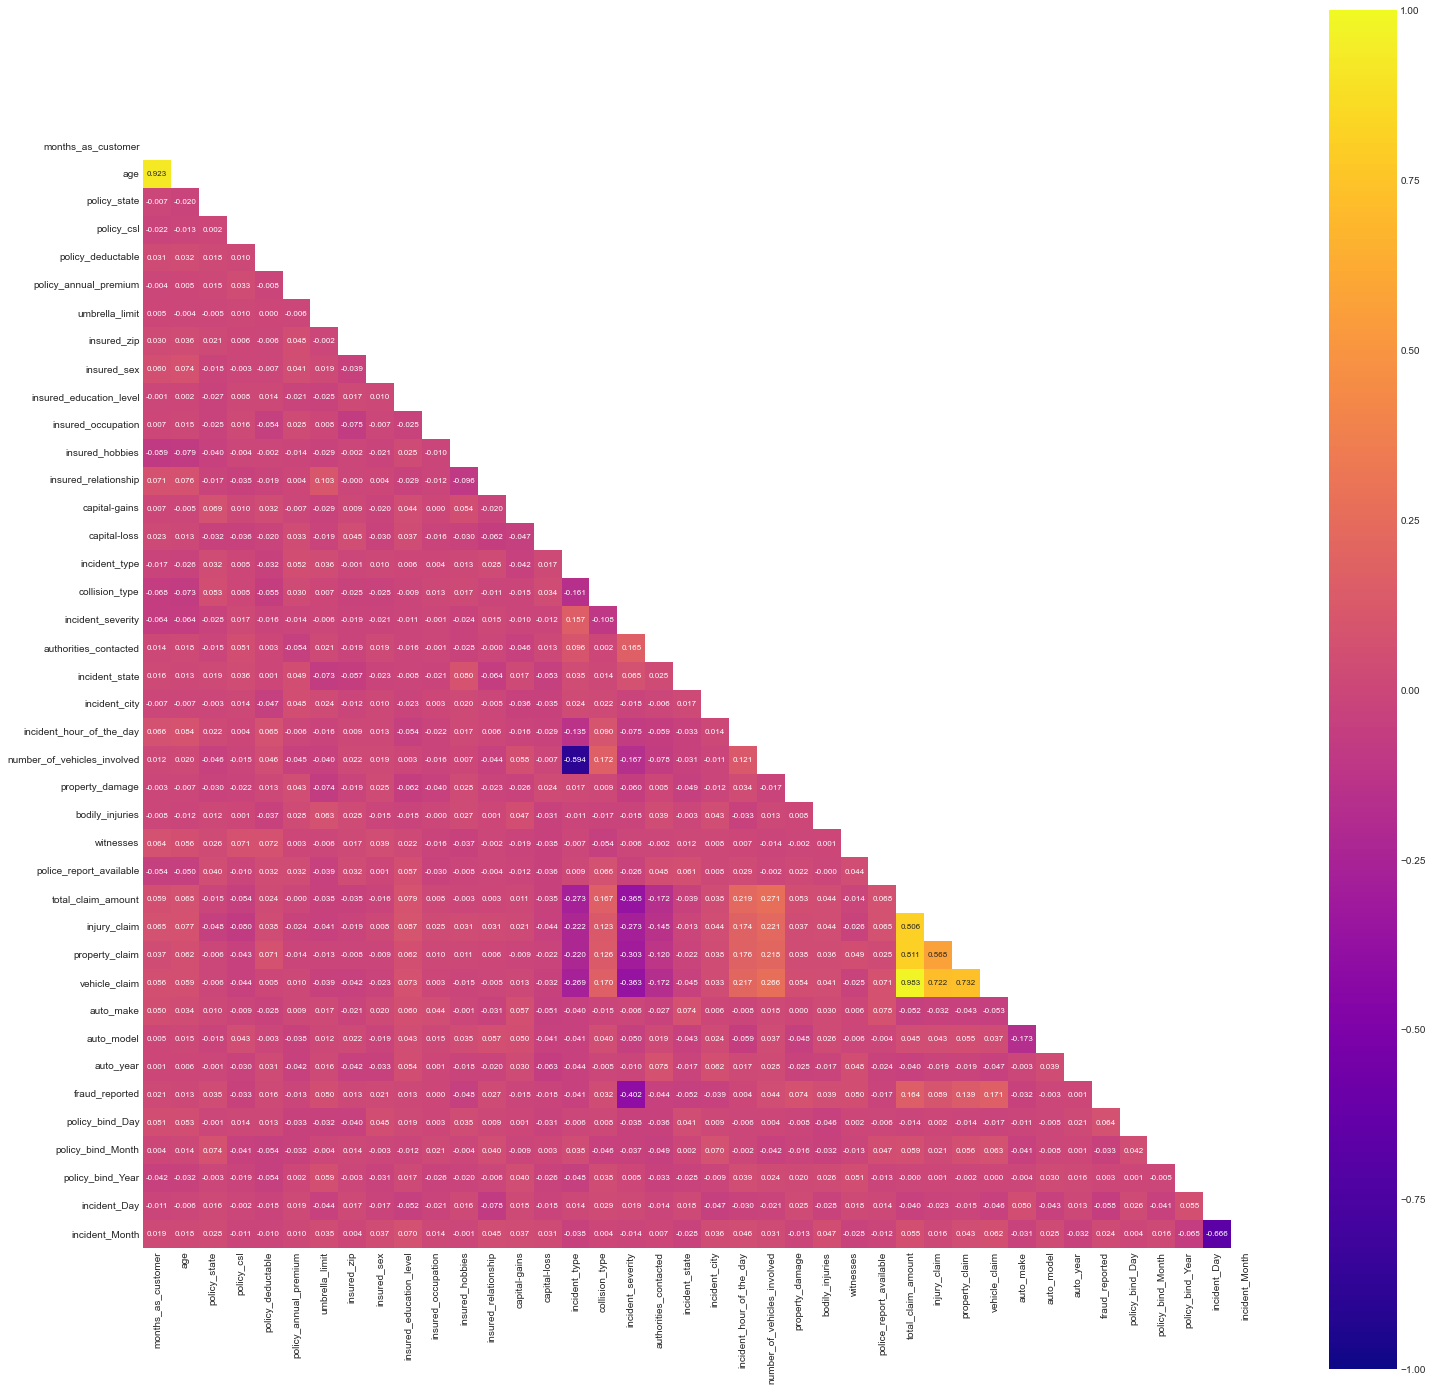

In [81]:
plt.style.use('seaborn-pastel')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="plasma", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


**Correlation is not visible,we are using Bar plot for same**

**Correlation**

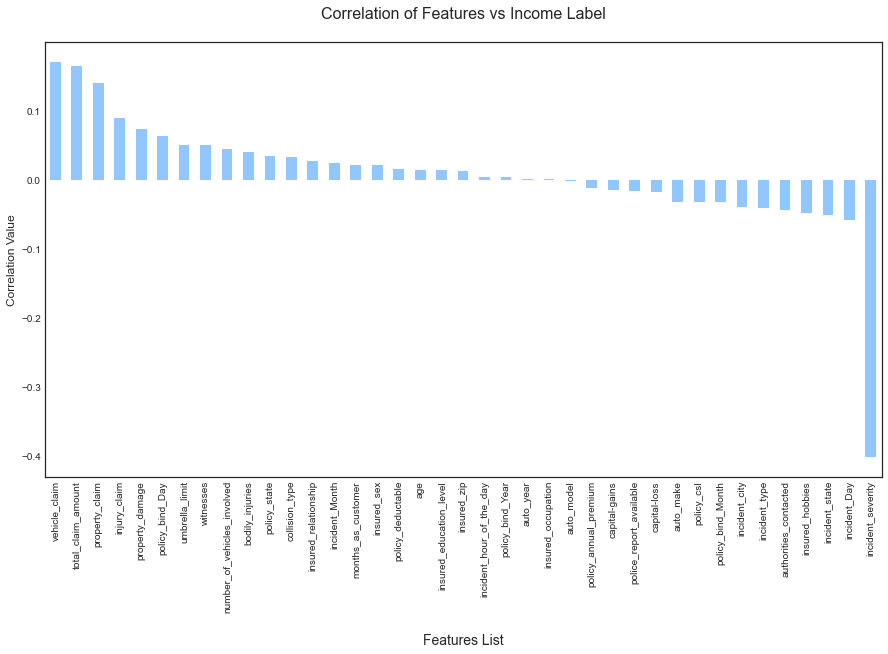

In [82]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

**We have a mix of features which are positively and negatively correlated with our Target Variable**

**Doppig NAN values,so we can use SMOTE for class Imbalance**

In [83]:
df.dropna(inplace=True)


**Splitting Dta into x(Features) and y(Label)**

In [84]:
x= df.drop('fraud_reported', axis=1)
y= df['fraud_reported']

**Handling Class_Imbalance using SMOTE**

In [85]:
y.value_counts()

0.0    739
1.0    240
Name: fraud_reported, dtype: int64

In [87]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
y.value_counts()

1.0    739
0.0    739
Name: fraud_reported, dtype: int64

**Data Scaling using Standard Scaler**

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
##Scaling data using Standard Scaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month
0,1.098536,1.034150,1.244137,0.092611,-0.239990,0.661353,-0.515608,-0.498566,1.125406,0.571779,...,1.134780,0.704642,0.910608,-1.710710,-0.167986,0.157334,1.143851,1.815599,1.249368,-0.754673
1,0.190264,0.352860,-0.035418,0.092611,1.505314,-0.252063,2.168636,-0.464075,1.125406,0.571779,...,-1.493338,-2.026848,0.383440,-0.668897,0.360277,1.365335,-0.098789,0.660182,0.843663,-0.754673
2,-0.663512,-1.123268,1.244137,-1.232629,1.505314,0.688491,2.168636,-1.123012,-1.008217,1.673565,...,-0.834161,-0.925141,-0.670896,1.035887,0.360277,-0.809066,-0.098789,-0.206380,0.945089,-0.428816
3,0.444580,0.239312,-1.314974,0.092611,1.505314,0.699817,2.200364,1.597494,-1.008217,1.673565,...,-0.299520,0.628158,-0.934480,1.414728,1.592890,1.123735,-0.409449,-1.650652,-1.184862,2.178035
4,0.190264,0.579957,-1.314974,1.417850,-0.239990,1.432370,2.200364,1.630983,1.125406,-1.631792,...,-1.521251,-1.968360,-1.725232,1.130598,0.712452,-1.171466,-0.098789,1.815599,0.437958,-0.428816


**Importing necessary Libraries for Model building**

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Finding maximum accuracy**

In [91]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 80.54054054054053 on Random State 213


**Train_Test_Split**

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=213)

**Defining a function to print Accuracy_score,CV_Score,printing Classification_report and finally the result by deducting Accuracy score from CV score to choose the least difference model**

In [93]:
# Classification Model Function

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=431)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

**Logistic Regression**

In [94]:
# Logistic Regression

model=LogisticRegression()
classify(model, x, y)

Accuracy Score: 70.8108108108108

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       192
         1.0       0.68      0.74      0.71       178

    accuracy                           0.71       370
   macro avg       0.71      0.71      0.71       370
weighted avg       0.71      0.71      0.71       370

Cross Validation Score: 73.41181859825929

Accuracy Score - Cross Validation Score is -2.6010077874484807


**Decision Tree Classifier**

In [95]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, x, y)

Accuracy Score: 80.54054054054053

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.78      0.81       192
         1.0       0.78      0.83      0.80       178

    accuracy                           0.81       370
   macro avg       0.81      0.81      0.81       370
weighted avg       0.81      0.81      0.81       370

Cross Validation Score: 82.07329363261566

Accuracy Score - Cross Validation Score is -1.5327530920751258


**Random Forest Classifier**

In [96]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, x, y)

Accuracy Score: 87.02702702702703

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       192
         1.0       0.86      0.88      0.87       178

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370

Cross Validation Score: 87.08749427393494

Accuracy Score - Cross Validation Score is -0.06046724690790484


**KNeighbours Classifier**

In [97]:
# KNeighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, x, y)

Accuracy Score: 55.13513513513514

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.15      0.25       192
         1.0       0.52      0.99      0.68       178

    accuracy                           0.55       370
   macro avg       0.73      0.57      0.47       370
weighted avg       0.73      0.55      0.46       370

Cross Validation Score: 57.03847915712322

Accuracy Score - Cross Validation Score is -1.903344021988083


**XGB Classifier**

In [98]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, x, y)

Accuracy Score: 87.29729729729729

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.85      0.87       192
         1.0       0.85      0.90      0.87       178

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370

Cross Validation Score: 86.95098488318827

Accuracy Score - Cross Validation Score is 0.3463124141090219


**Hyperparameter Tuning on Final Model Random Forest Classifier**

In [99]:
fmod_param = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2, 3, 4, 5],
              'min_samples_split':[3,5,7,9],
              'min_samples_leaf' : [2,3,4,5]}

In [100]:
GSCV = GridSearchCV(RandomForestClassifier(), fmod_param, cv=5)

In [101]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [3, 5, 7, 9]})

In [102]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 9}

In [103]:
Final_Model = RandomForestClassifier(criterion="entropy", max_depth=5, min_samples_leaf=3,min_samples_split=9)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 89.45945945945945


**ROC Curve**

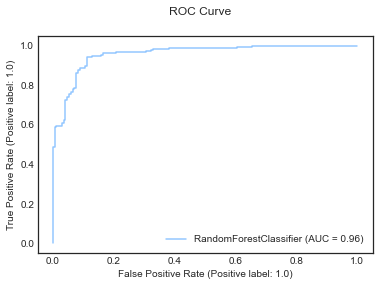

In [104]:
auc = metrics.plot_roc_curve(Final_Model, x_test, y_test)
auc.figure_.suptitle("ROC Curve")
plt.show()

**Confusion Matrix**

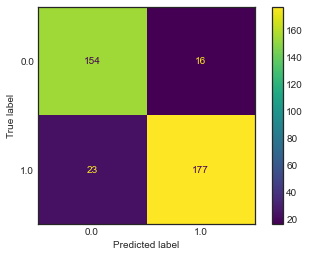

In [105]:
metrics_n = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test)

plt.show()

**We are witnessing the true counts our Model has predicted and result of Confusion matrix is Satisfactory**

**Saving Final model**

In [106]:
import joblib
filename = "Final_RF.pkl"
joblib.dump(Final_Model, filename)

['Final_RF.pkl']

**Model is Completed**

**Thanks for Evaluating the Model**